In [3]:
import numpy as np

from astropaint import Canvas
from astropaint.lib import utilities

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(8,6)

np.random.seed(0)

You can fetch the Planck 2018 CMB TT power spectrum using the `utilities.get_CMB_Cl` function.

In [4]:
lmax = 6000
L, CMB_Cl = utilities.get_CMB_Cl(lmax, mode="TT", return_ell=True, uK=True)

(2, 6000)

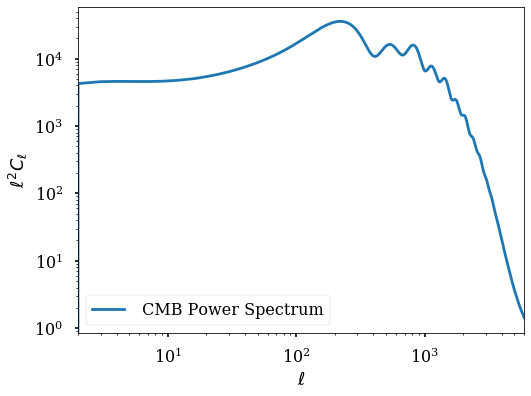

In [5]:
plt.loglog(L, L**2*CMB_Cl, label =" CMB Power Spectrum")

plt.ylabel("$\ell^2 C_\ell$")
plt.xlabel("$\ell$")

plt.legend()
plt.xlim(2,lmax)

Now let's initialize a canvas with no catalog.

In [6]:
nside = 2048 
canvas = Canvas(None,nside)

Building the dataframe and updating all the parameters...

Done!


In [7]:
canvas.add_cmb(Cl=CMB_Cl)

/Users/siavashyasini/.local/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/Users/siavashyasini/.local/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/Users/siavashyasini/.local/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


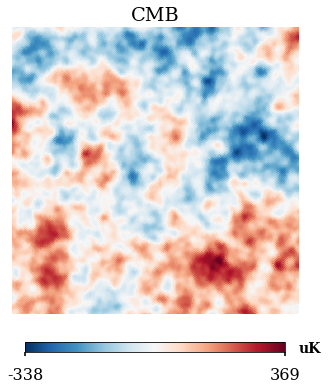

In [8]:
canvas.show_map("cart", 
                lonra=[0,5], latra=[0,5],
               title="CMB",
               unit="uK")

Cool! Now let's cut this out of the canvas using the cutout method which returns a generator. 

In [9]:
cutouts = canvas.cutouts(halo_list="all", 
                         lon_range=[0,5], lat_range=[0,5],
                         xpix=400
                        )

The `halo_list="all"` argument isn't really doing anything here. Since we didn't pass a catalog into the canvas, an empty one had been generated implicitly. This is what it looks like:

In [10]:
canvas.catalog.data

,x,y,z,v_x,v_y,v_z,M_200c,D_c,lat,lon,...,R_200c,c_200c,R_ang_200c,rho_s,R_s,v_r,v_th,v_ph,v_lat,v_lon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,inf,NaN,NaN,0.0,0.0,0.0,0.0,-0.0,0.0


This is a single point at the center of the map, so the `cutouts` generator only contains a single patch around this point. 

In [11]:
patch = list(cutouts)[0] # equivalent to patch=next(cutouts)

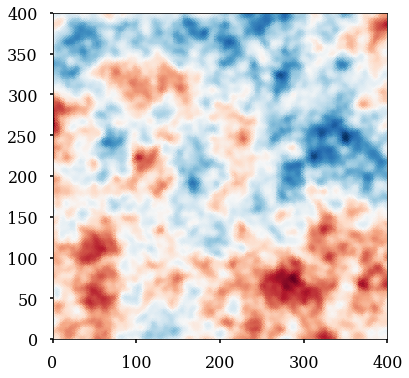

In [12]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

plt.pcolor(patch, cmap=canvas.cmap, )

We could have added noise to the patch in a similar way.

In [13]:
Nl = utilities.get_experiment_Nl(lmax=lmax, name="Planck", frequency=[217], uK=True)

Planck noise @ [217] GHz:
fwhm    [arcmin]    = [5.0]
sigma_T [uK-arcmin] = [46.8]



(2, 6000)

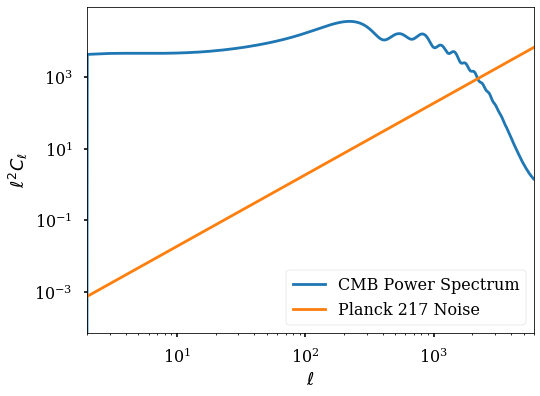

In [14]:
plt.loglog(L, L**2*CMB_Cl, label = "CMB Power Spectrum")
plt.loglog(L, L**2*Nl, label ="Planck 217 Noise")

plt.ylabel("$\ell^2 C_\ell$")
plt.xlabel("$\ell$")

plt.legend()
plt.xlim(2,lmax)

In [15]:
canvas.add_noise(Nl=Nl)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


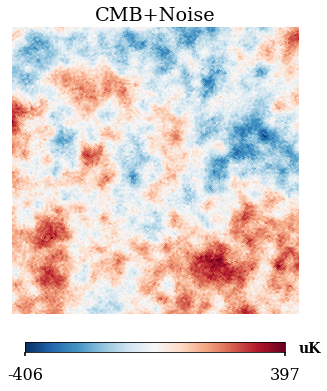

In [16]:
canvas.show_map("cart", 
                lonra=[0,5], latra=[0,5],
                title="CMB+Noise",
                unit="uK")

This is a bit noisier than what we had before. Can you see it? 